In [2]:
# import các thư viện cơ bản
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Đọc dữ liệu

In [3]:
df0 = pd.read_csv('PL.csv')
df1 = pd.read_csv('LL.csv')
df2 = pd.read_csv('B.csv')
df3= pd.read_csv('S.csv')
df4 = pd.read_csv('L1.csv')

Tạo cột giải đấu

In [4]:
df0["League"] = 'Premier League'
df1["League"] = 'La liga'
df2["League"] = 'Bundesliga'
df3["League"] = 'Serie A'
df4["League"] = 'Ligue 1'

In [5]:
df0["LeagueCode"] = 1
df1["LeagueCode"] = 2
df2["LeagueCode"] = 3
df3["LeagueCode"] = 4
df4["LeagueCode"] = 5

In [6]:
print(f"Số trận đấu Premier League: {df0.shape[0]}")
print(f"Số trận đấu Laliga: {df1.shape[0]}")
print(f"Số trận đấu Bundesliga: {df2.shape[0]}")
print(f"Số trận đấu Serie A: {df3.shape[0]}")
print(f"Số trận đấu Ligue 1: {df4.shape[0]}")

Số trận đấu Premier League: 4160
Số trận đấu Laliga: 4160
Số trận đấu Bundesliga: 3357
Số trận đấu Serie A: 4160
Số trận đấu Ligue 1: 3922


Kiểm tra loại bỏ dữ liệu thiếu

In [7]:
for df in [df0, df1, df2, df3, df4]:
    missing_rows = df[df.isnull().any(axis=1)]
    print(f"Số dòng bị thiếu dữ liệu: {len(missing_rows)}")
    missing_rows[['Date','Div','HomeTeam','AwayTeam',]].head()

Số dòng bị thiếu dữ liệu: 0
Số dòng bị thiếu dữ liệu: 0
Số dòng bị thiếu dữ liệu: 1
Số dòng bị thiếu dữ liệu: 2
Số dòng bị thiếu dữ liệu: 1


In [8]:
df0 = df0.dropna().reset_index(drop=True)
df1 = df1.dropna().reset_index(drop=True)
df2 = df2.dropna().reset_index(drop=True)
df3 = df3.dropna().reset_index(drop=True)
df4 = df4.dropna().reset_index(drop=True)

Định dạng ngày tháng  về dạng 2014-08-30

In [9]:
from dateutil import parser

df0['Date'] = df0['Date'].apply(lambda x: parser.parse(str(x), dayfirst=True) if pd.notnull(x) else None)
df1['Date'] = df1['Date'].apply(lambda x: parser.parse(str(x), dayfirst=True) if pd.notnull(x) else None)
df2['Date'] = df2['Date'].apply(lambda x: parser.parse(str(x), dayfirst=True) if pd.notnull(x) else None)
df3['Date'] = df3['Date'].apply(lambda x: parser.parse(str(x), dayfirst=True) if pd.notnull(x) else None)
df4['Date'] = df4['Date'].apply(lambda x: parser.parse(str(x), dayfirst=True) if pd.notnull(x) else None)



In [10]:
for df in [df0, df1, df2, df3, df4]:
    # Kiểm tra dòng nào bị lỗi khi chuyển ngày
    invalid_dates = df[df['Date'].isnull()]
    print(f'Số dòng lỗi định dạng ngày: {len(invalid_dates)}')

Số dòng lỗi định dạng ngày: 0
Số dòng lỗi định dạng ngày: 0
Số dòng lỗi định dạng ngày: 0
Số dòng lỗi định dạng ngày: 0
Số dòng lỗi định dạng ngày: 0


In [11]:
df0 = df0.sort_values(by='Date').reset_index(drop=True)
df1 = df1.sort_values(by='Date').reset_index(drop=True)
df2 = df2.sort_values(by='Date').reset_index(drop=True)
df3 = df3.sort_values(by='Date').reset_index(drop=True)
df4 = df4.sort_values(by='Date').reset_index(drop=True)

In [12]:

df0.duplicated(subset = ['Date', 'HomeTeam', 'AwayTeam']).sum()
df1.duplicated(subset = ['Date', 'HomeTeam', 'AwayTeam']).sum()
df2.duplicated(subset = ['Date', 'HomeTeam', 'AwayTeam']).sum()
df3.duplicated(subset = ['Date', 'HomeTeam', 'AwayTeam']).sum()
df4.duplicated(subset = ['Date', 'HomeTeam', 'AwayTeam']).sum()


np.int64(0)

In [13]:
dfs = [df0, df1, df2, df3, df4]
names = ["Premier League", "La Liga", "Bundesliga", "Serie A", "Ligue 1"]

for name, df in zip(names, dfs):
    print(f"\n {name} - Thống kê kết quả FTR:")
    counts = df['FTR'].value_counts()
    total = counts.sum()
    for result in ['H', 'D', 'A']:
        pct = counts.get(result, 0) / total * 100
        print(f"{result}: {counts.get(result, 0)} trận ({pct:.2f}%)")



 Premier League - Thống kê kết quả FTR:
H: 1853 trận (44.54%)
D: 977 trận (23.49%)
A: 1330 trận (31.97%)

 La Liga - Thống kê kết quả FTR:
H: 1890 trận (45.43%)
D: 1083 trận (26.03%)
A: 1187 trận (28.53%)

 Bundesliga - Thống kê kết quả FTR:
H: 1498 trận (44.64%)
D: 837 trận (24.94%)
A: 1021 trận (30.42%)

 Serie A - Thống kê kết quả FTR:
H: 1766 trận (42.47%)
D: 1082 trận (26.02%)
A: 1310 trận (31.51%)

 Ligue 1 - Thống kê kết quả FTR:
H: 1721 trận (43.89%)
D: 998 trận (25.45%)
A: 1202 trận (30.66%)


In [14]:
#Mã hóa cột kết quả trận đấu
df0["FTR"] = df0["FTR"].map({"H": 0, "D": 1, "A": 2})
df1["FTR"] = df1["FTR"].map({"H": 0, "D": 1, "A": 2})
df2["FTR"] = df2["FTR"].map({"H": 0, "D": 1, "A": 2})
df3["FTR"] = df3["FTR"].map({"H": 0, "D": 1, "A": 2})
df4["FTR"] = df4["FTR"].map({"H": 0, "D": 1, "A": 2})


### Tính đặc trưng



In [15]:
def createID(df):
    df["MatchOrder"] = df.sort_values("Date").groupby(["Season", "Div"]).cumcount() + 1
    df["MatchID"] =  df["Div"].astype(str) + "_" + df["Season"].astype(str) + "_" + df["MatchOrder"].astype(str)
    return df

In [16]:
df0 = createID(df0)
df1 = createID(df1)
df2 = createID(df2)
df3 = createID(df3)
df4 = createID(df4)

In [557]:
df1

,Div,Date,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HomeRank,AwayRank,HomeGF,HomeGA,AwayGF,AwayGA,League,LeagueCode,MatchOrder,MatchID
0,SP1,2014-08-23,2014-2015,Granada,La Coruna,2,1,0,0,1,...,3,4,0,0,0,0,La liga,2,1,SP1_2014-2015_1
1,SP1,2014-08-23,2014-2015,Malaga,Ath Bilbao,1,0,0,1,0,...,5,4,0,0,0,0,La liga,2,2,SP1_2014-2015_2
2,SP1,2014-08-23,2014-2015,Sevilla,Valencia,1,1,1,1,0,...,5,6,0,0,0,0,La liga,2,3,SP1_2014-2015_3
3,SP1,2014-08-23,2014-2015,Almeria,Espanol,1,1,1,0,0,...,1,2,0,0,0,0,La liga,2,4,SP1_2014-2015_4
4,SP1,2014-08-24,2014-2015,Levante,Villarreal,0,2,2,0,0,...,10,11,0,0,0,0,La liga,2,5,SP1_2014-2015_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,SP1,2025-05-14,2024-2025,Real Madrid,Mallorca,2,1,0,0,1,...,2,9,72,37,33,40,La liga,2,355,SP1_2024-2025_355
4156,SP1,2025-05-15,2024-2025,Osasuna,Ath Madrid,2,0,0,1,0,...,10,3,43,51,60,27,La liga,2,359,SP1_2024-2025_359
4157,SP1,2025-05-15,2024-2025,Getafe,Ath Bilbao,0,2,2,0,0,...,15,4,31,34,51,26,La liga,2,357,SP1_2024-2025_357
4158,SP1,2025-05-15,2024-2025,Vallecano,Betis,2,2,1,2,0,...,8,6,37,42,53,43,La liga,2,358,SP1_2024-2025_358


Tách riêng đội khách và đội nhà trong trên 1 dòng ra và gáng thông số tương ứng để tính trung bình cho từng đội theo từng trận

In [17]:
def features(df):
    df = df.copy()

    home = df[[ "MatchID", "Date", "HomeTeam",  "Season","FTHG", "FTAG", "HS", "HST","HC", "HF","HY","HR"]].copy()
    home.columns = ["ID", "Date", "Team" ,"Season", "GF", "GA", "Sh", "ShT","Cn","F","YC","RC"]

    home["Point"] = df["FTR"].map({0: 3, 1: 1, 2: 0})

    home["Conv_rate"] = np.where(home["Sh"] == 0, 0, home["GF"] / home["Sh"])
    home["ShT_ratio"] = np.where(home["Sh"] == 0, 0, home["ShT"] / home["Sh"])

    home["Win"] = df["FTR"].map({0: 1, 1: 0, 2: 0})
    home["Draw"] = df["FTR"].map({0: 0, 1: 1, 2: 0})
    home["Lose"] = df["FTR"].map({0: 0, 1: 0, 2: 1})
    home["is_home"] = 1

    away = df[[ "MatchID","Date", "AwayTeam", "Season","FTAG", "FTHG", "AS","AST","AC", "AF","AY","AR"]].copy()
    away.columns = [ "ID","Date", "Team", "Season","GF", "GA","Sh", "ShT" ,"Cn", "F","YC","RC"]

    away["Point"] = df["FTR"].map({0: 0, 1: 1, 2: 3})

    away["Conv_rate"] = np.where(away["Sh"] == 0, 0, away["GF"] / away["Sh"])
    away["ShT_ratio"] = np.where(away["Sh"] == 0, 0, away["ShT"] / away["Sh"])
    away["Win"] = df["FTR"].map({0: 0, 1: 0, 2: 1})

    away["Draw"] = df["FTR"].map({0: 0, 1: 1, 2: 0})
    away["Lose"] = df["FTR"].map({0: 1, 1: 0, 2: 0})
    away["is_home"] = 0

    team_matches = pd.concat([home, away], ignore_index=True)
    team_matches = team_matches.sort_values(["Date","ID", "is_home"]).reset_index(drop=True)
    return team_matches


Tính trung bình phong độ 7 trận gần đây

In [18]:
def rolling_averages(group, cols, new_cols, window_size=7):
    group = group.sort_values("Date").copy()

    rolling_stats = (
        group[cols].shift(0)
        .rolling(window=window_size, min_periods=1, closed='left')
        .mean()
        .fillna(0)
        .round(2)
    )
    group[new_cols] = rolling_stats
    return group


In [19]:
cols = ["GF", "GA", "Point", "Sh", "ShT",	"Conv_rate", "ShT_ratio" ,"Win", "Draw","Lose","Cn","F","YC","RC"]
new_cols = [f"{c}_avg" for c in cols]

def apply_rolling(team_matches):
    team_matches = team_matches.groupby(["Season", "Team"]).apply(rolling_averages, cols, new_cols=new_cols)
    return team_matches.reset_index(drop=True)

Chọn các đặc trưng muốn hợp vào dataset

In [20]:
selected_cols = ["ID","Date","Team",
                 "GF_avg", "GA_avg", "Point_avg",
                 "Sh_avg", "ShT_avg", "Conv_rate_avg", "ShT_ratio_avg",
                 "Cn_avg", "F_avg", "YC_avg", "RC_avg" ,
                 "Win_avg", "Draw_avg", "Lose_avg"]

def select_cols(team_matches):
    team_matches = team_matches[selected_cols]
    return team_matches

hợp lại với dataset

In [22]:
def merge_back(df, team_matches):
    df = df.merge(
        team_matches.rename(columns={
            "ID": "MatchID",
            "Team": "HomeTeam",
            "Date": "Date",
            "Point_avg": "Home_point_avg",
            "GF_avg": "Home_avg_gf",
            "GA_avg": "Home_avg_ga",
            "Sh_avg": "Home_avg_sh",
            "ShT_avg": "Home_avg_sht",
            "Cn_avg": "Home_avg_cn",
            "Conv_rate_avg": "Home_conv_rate_avg",
            "ShT_ratio_avg": "Home_shT_ratio_avg",
            "F_avg": "Home_F_avg",
            "YC_avg": "Home_YC_avg",
            "RC_avg": "Home_RC_avg",
            "Win_avg": "Home_win_avg",
            "Draw_avg": "Home_draw_avg",
            "Lose_avg": "Home_lose_avg"
        }),
        on=["MatchID", "HomeTeam"],
        how="left"
    )
    df = df.merge(
    team_matches.rename(columns={
        "ID": "MatchID",
        "Team": "AwayTeam",
        "Date": "Date",
        "Point_avg": "Away_point_avg",
        "GF_avg": "Away_avg_gf",
        "GA_avg": "Away_avg_ga",
        "Sh_avg": "Away_avg_sh",
        "ShT_avg": "Away_avg_sht",
        "Cn_avg": "Away_avg_cn",
        "Conv_rate_avg": "Away_conv_rate_avg",
        "ShT_ratio_avg": "Away_shT_ratio_avg",
        "F_avg": "Away_F_avg",
        "YC_avg": "Away_YC_avg",
        "RC_avg": "Away_RC_avg",
        "Win_avg": "Away_win_avg",
        "Draw_avg": "Away_draw_avg",
        "Lose_avg": "Away_lose_avg"
    }),
    on=["MatchID", "AwayTeam"],
    how="left"
    )
    df = df.sort_values("Date").reset_index(drop=True)
    return df

In [23]:
def generate_features(df):
    team_matches =  features(df)
    team_matches = apply_rolling(team_matches)
    team_matches = select_cols(team_matches)
    df = merge_back(df, team_matches)
    return df

In [24]:
EPL_DATA = df0
LaLiga_DATA = df1
Bundesliga_DATA = df2
SerieA_Data = df3
Ligue1_DATA = df4

In [25]:
  EPL_DATA = generate_features(EPL_DATA)
  LaLiga_DATA = generate_features(LaLiga_DATA)
  Bundesliga_DATA = generate_features(Bundesliga_DATA)
  SerieA_Data = generate_features(SerieA_Data)
  Ligue1_DATA = generate_features(Ligue1_DATA)

<ipython-input-19-d322539f989c>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  team_matches = team_matches.groupby(["Season", "Team"]).apply(rolling_averages, cols, new_cols=new_cols)
<ipython-input-19-d322539f989c>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  team_matches = team_matches.groupby(["Season", "Team"]).apply(rolling_averages, cols, new_cols=new_cols)
<ipython-input-19-d322539f989c>:5: Dep

In [566]:
EPL_DATA[((EPL_DATA["HomeTeam"]=="Liverpool") | (EPL_DATA["AwayTeam"]=="Liverpool"))  ].head(8)

,Div,Date_x,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,Away_avg_sht,Away_conv_rate_avg,Away_shT_ratio_avg,Away_avg_cn,Away_F_avg,Away_YC_avg,Away_RC_avg,Away_win_avg,Away_draw_avg,Away_lose_avg
8,E0,2014-08-17,2014-2015,Liverpool,Southampton,2.0,1.0,0,1.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
19,E0,2014-08-25,2014-2015,Man City,Liverpool,3.0,1.0,0,1.0,0.0,...,5.00,0.17,0.42,2.00,8.00,1.00,0.0,1.00,0.00,0.00
29,E0,2014-08-31,2014-2015,Tottenham,Liverpool,0.0,3.0,2,0.0,1.0,...,4.00,0.13,0.34,4.50,7.50,1.00,0.0,0.50,0.00,0.50
34,E0,2014-09-13,2014-2015,Liverpool,Aston Villa,0.0,1.0,2,0.0,1.0,...,2.00,0.11,0.22,6.00,9.67,2.67,0.0,0.67,0.33,0.00
44,E0,2014-09-20,2014-2015,West Ham,Liverpool,3.0,1.0,0,2.0,1.0,...,4.25,0.11,0.30,4.75,8.75,2.00,0.0,0.50,0.00,0.50
56,E0,2014-09-27,2014-2015,Liverpool,Everton,1.0,1.0,1,0.0,0.0,...,4.40,0.18,0.32,5.00,8.60,1.60,0.0,0.20,0.40,0.40
63,E0,2014-10-04,2014-2015,Liverpool,West Brom,2.0,1.0,0,1.0,0.0,...,3.33,0.08,0.28,7.33,11.17,2.00,0.0,0.33,0.33,0.33
77,E0,2014-10-19,2014-2015,QPR,Liverpool,2.0,3.0,2,0.0,0.0,...,5.29,0.10,0.34,5.29,9.43,1.86,0.0,0.43,0.14,0.43


In [ ]:
LaLiga_DATA[(LaLiga_DATA["HomeTeam"]=="Barcelona") | (LaLiga_DATA["AwayTeam"]=="Barcelona")].head(8)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away_avg_sht,Away_conv_rate_avg,Away_shT_ratio_avg,Away_avg_cn,Away_F_avg,Away_YC_avg,Away_RC_avg,Away_win_avg,Away_draw_avg,Away_lose_avg
4,SP1,2014-08-24,Barcelona,Elche,3,0,0,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,SP1,2014-08-31,Villarreal,Barcelona,0,1,2,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,SP1,2014-09-13,Barcelona,Ath Bilbao,2,0,0,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,SP1,2014-09-21,Levante,Barcelona,0,5,2,0,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,SP1,2014-09-24,Malaga,Barcelona,0,0,1,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,SP1,2014-09-27,Barcelona,Granada,6,0,0,3,0,H,...,2.4,0.146667,0.4200,5.6,15.2,2.8,0.0,0.4,0.4,0.2
61,SP1,2014-10-04,Vallecano,Barcelona,0,2,2,0,2,A,...,7.2,0.158648,0.4071,7.4,11.2,1.6,0.0,0.8,0.2,0.0
72,SP1,2014-10-18,Barcelona,Eibar,3,0,0,0,0,D,...,3.4,0.121429,0.3400,3.8,13.8,2.8,0.0,0.2,0.6,0.2


In [ ]:
Ligue1_DATA[(Ligue1_DATA["HomeTeam"]=="Evian Thonon Gaillard") | (Ligue1_DATA["AwayTeam"]=="Evian Thonon Gaillard")].head(8)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away_avg_sht,Away_conv_rate_avg,Away_shT_ratio_avg,Away_avg_cn,Away_F_avg,Away_YC_avg,Away_RC_avg,Away_win_avg,Away_draw_avg,Away_lose_avg
2,F1,2014-08-09,Evian Thonon Gaillard,Caen,0.0,3.0,2,0.0,3.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,F1,2014-08-16,Rennes,Evian Thonon Gaillard,6.0,2.0,0,3.0,1.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,F1,2014-08-22,Evian Thonon Gaillard,Paris SG,0.0,0.0,1,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,F1,2014-08-30,Toulouse,Evian Thonon Gaillard,1.0,0.0,0,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,F1,2014-09-14,Evian Thonon Gaillard,Marseille,1.0,3.0,2,0.0,2.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,F1,2014-09-19,Bordeaux,Evian Thonon Gaillard,2.0,1.0,0,1.0,0.0,H,...,2.0,0.064444,0.228254,4.6,14.8,1.6,0.2,0.0,0.2,0.8
64,F1,2014-09-24,Evian Thonon Gaillard,Lens,2.0,1.0,0,2.0,0.0,H,...,3.6,0.108964,0.340430,3.8,13.8,2.6,0.0,0.4,0.2,0.4
71,F1,2014-09-27,Lorient,Evian Thonon Gaillard,0.0,2.0,2,0.0,1.0,A,...,2.0,0.073571,0.214444,5.6,14.6,1.6,0.2,0.2,0.2,0.6


In [ ]:
Bundesliga_DATA[(Bundesliga_DATA["HomeTeam"]=="Bayern Munich") | (Bundesliga_DATA["AwayTeam"]=="Bayern Munich")].head(8)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away_avg_sht,Away_conv_rate_avg,Away_shT_ratio_avg,Away_avg_cn,Away_F_avg,Away_YC_avg,Away_RC_avg,Away_win_avg,Away_draw_avg,Away_lose_avg
0,D1,2014-08-22,Bayern Munich,Wolfsburg,2,1,0,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,D1,2014-08-30,Schalke 04,Bayern Munich,1,1,1,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,D1,2014-09-13,Bayern Munich,Stuttgart,2,0,0,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,D1,2014-09-20,Hamburg,Bayern Munich,0,0,1,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,D1,2014-09-23,Bayern Munich,Paderborn,4,0,0,2.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,D1,2014-09-27,FC Koln,Bayern Munich,0,2,2,0.0,1.0,A,...,6.8,0.104101,0.423933,6.4,11.0,0.8,0.0,0.6,0.4,0.0
55,D1,2014-10-04,Bayern Munich,Hannover,4,0,0,3.0,0.0,H,...,4.0,0.058586,0.365945,2.8,14.0,1.2,0.0,0.4,0.2,0.4
69,D1,2014-10-18,Bayern Munich,Werder Bremen,6,0,0,4.0,0.0,H,...,5.0,0.141880,0.436752,6.0,16.4,2.0,0.0,0.0,0.4,0.6


In [ ]:
SerieA_Data[(SerieA_Data["HomeTeam"]=="Juventus") | (SerieA_Data["AwayTeam"]=="Juventus")].head(8)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away_avg_sht,Away_conv_rate_avg,Away_shT_ratio_avg,Away_avg_cn,Away_F_avg,Away_YC_avg,Away_RC_avg,Away_win_avg,Away_draw_avg,Away_lose_avg
0,I1,2014-08-30,Chievo,Juventus,0.0,1.0,2,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,I1,2014-09-13,Juventus,Udinese,2.0,0.0,0,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,I1,2014-09-20,Milan,Juventus,0.0,1.0,2,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,I1,2014-09-24,Juventus,Cesena,3.0,0.0,0,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,I1,2014-09-27,Atalanta,Juventus,0.0,3.0,2,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,I1,2014-10-05,Juventus,Roma,3.0,2.0,0,2.0,2.0,D,...,4.0,0.165303,0.329427,4.2,13.2,2.0,0.0,1.0,0.0,0.0
61,I1,2014-10-18,Sassuolo,Juventus,1.0,1.0,1,1.0,1.0,D,...,7.2,0.124698,0.362076,4.4,14.0,2.0,0.2,1.0,0.0,0.0
76,I1,2014-10-26,Juventus,Palermo,2.0,0.0,0,1.0,0.0,H,...,3.6,0.108718,0.321638,5.8,15.8,3.4,0.0,0.2,0.4,0.4


In [26]:
dfs = [EPL_DATA, LaLiga_DATA, Bundesliga_DATA, SerieA_Data, Ligue1_DATA]
name = ["Premier League", "La Liga", "Bundesliga", "Serie A", "Ligue 1"]

for i, df in enumerate(dfs):
    print(f"\n số lượng giá trị null trong {name[i]}")
    print(df.isnull().sum().sort_values(ascending=False))


 số lượng giá trị null trong Premier League
Div              0
Date_x           0
Season           0
HomeTeam         0
AwayTeam         0
                ..
Away_YC_avg      0
Away_RC_avg      0
Away_win_avg     0
Away_draw_avg    0
Away_lose_avg    0
Length: 67, dtype: int64

 số lượng giá trị null trong La Liga
Div              0
Date_x           0
Season           0
HomeTeam         0
AwayTeam         0
                ..
Away_YC_avg      0
Away_RC_avg      0
Away_win_avg     0
Away_draw_avg    0
Away_lose_avg    0
Length: 67, dtype: int64

 số lượng giá trị null trong Bundesliga
Div              0
Date_x           0
Season           0
HomeTeam         0
AwayTeam         0
                ..
Away_YC_avg      0
Away_RC_avg      0
Away_win_avg     0
Away_draw_avg    0
Away_lose_avg    0
Length: 67, dtype: int64

 số lượng giá trị null trong Serie A
Div              0
Date_x           0
Season           0
HomeTeam         0
AwayTeam         0
                ..
Away_YC_avg      0
Awa

In [28]:
rolling_cols = [col for col in EPL_DATA.columns if "_avg" in col]
EPL_DATA = EPL_DATA.dropna(subset=rolling_cols)

rolling_cols = [col for col in LaLiga_DATA.columns if "_avg" in col]
LaLiga_DATA = LaLiga_DATA.dropna(subset=rolling_cols)

rolling_cols = [col for col in Bundesliga_DATA.columns if "_avg" in col]
Bundesliga_DATA = Bundesliga_DATA.dropna(subset=rolling_cols)

rolling_cols = [col for col in SerieA_Data.columns if "_avg" in col]
SerieA_Data = SerieA_Data.dropna(subset=rolling_cols)

rolling_cols = [col for col in Ligue1_DATA.columns if "_avg" in col]
Ligue1_DATA = Ligue1_DATA.dropna(subset=rolling_cols)

In [29]:
def tinh_dac_trung(df):

    df = df.copy()
    # 1. Tổng quan sức mạnh
    df["diff_point"] = df["HomePoint"] - df["AwayPoint"]
    df["diff_rank"] = df["HomeRank"] - df["AwayRank"]

    df["diff_GD"] = df["HomeDiff"] - df["AwayDiff"]
    df["diff_GF"] = df["HomeGF"] - df["AwayGF"]
    df["diff_GA"] = df["HomeGA"] - df["AwayGA"]

    # 2. Phong độ gần đây
    df["diff_Form"] = df["Home_point_avg"] - df["Away_point_avg"]
    df["diff_Win"]  = df["Home_win_avg"] - df["Away_win_avg"]
    df["diff_Lose"] = df["Home_lose_avg"] - df["Away_lose_avg"]
    df["diff_Draw"] = df["Home_draw_avg"] - df["Away_draw_avg"]


    # 3. Tấn công – phòng ngự gần đây
    df["diff_gf"] = df["Home_avg_gf"] - df["Away_avg_gf"]
    df["diff_ga"] = df["Home_avg_ga"] - df["Away_avg_ga"]

    df["diff_cn"] = df["Home_avg_cn"] - df["Away_avg_cn"]

    df["diff_yc"] = df["Home_YC_avg"] - df["Away_YC_avg"]
    df["diff_f"] = df["Home_F_avg"] - df["Away_F_avg"]

    df["diff_rc"] = df["Home_RC_avg"] - df["Away_RC_avg"]

    df["diff_sh"] = df["Home_avg_sh"] - df["Away_avg_sh"]
    df["diff_sht"] = df["Home_avg_sht"] - df["Away_avg_sht"]

    df["draw_score"] = (
      (df["diff_rank"].abs() <= 6).astype(int) +
      (df["diff_point"].abs() <= 6).astype(int) +
      (df["diff_GD"].abs() <= 15).astype(int) +
      (df["diff_GA"].abs() <= 10).astype(int) +
      (df["diff_GF"].abs() <= 10).astype(int) +
      (df["diff_Form"].abs() <= 0.6).astype(int)+
      (df["diff_Win"].abs() <= 0.25).astype(int) +
      (df["diff_Lose"].abs() <= 0.25).astype(int) +
      (df["diff_gf"].abs() <=1.5).astype(int) +
      (df["diff_ga"].abs() <=1.5).astype(int) +
      (df["diff_sh"].abs() <= 4).astype(int) +
      (df["diff_sht"].abs() <= 2).astype(int)
    )/12


    return df


In [30]:
dt1 = None
dt2 = None
dt3 = None
dt4 = None
dt5 = None

In [31]:
  dt1 = tinh_dac_trung(EPL_DATA)
  dt2 = tinh_dac_trung(LaLiga_DATA)
  dt3 = tinh_dac_trung(Bundesliga_DATA)
  dt4 = tinh_dac_trung(SerieA_Data)
  dt5 = tinh_dac_trung(Ligue1_DATA)

In [32]:
data = pd.concat([dt1, dt2, dt3, dt4, dt5], ignore_index=True)

Kiểm tra đặc trưng có phân biệt rõ ràng cho 3 lớp ko

<Axes: xlabel='FTR', ylabel='draw_score'>

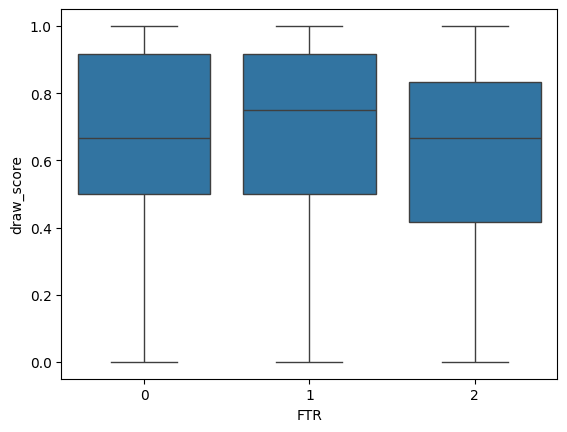

In [505]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data, x="FTR", y="draw_score")

### Huấn luyện mô hình

In [33]:
features_df = data.copy()
features_df.head()

,Div,Date_x,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,diff_Draw,diff_gf,diff_ga,diff_cn,diff_yc,diff_f,diff_rc,diff_sh,diff_sht,draw_score
0,E0,2014-08-16,2014-2015,Arsenal,Crystal Palace,2.0,1.0,0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,E0,2014-08-16,2014-2015,Man United,Swansea,1.0,2.0,2,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,E0,2014-08-16,2014-2015,QPR,Hull,0.0,1.0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,E0,2014-08-16,2014-2015,Stoke,Aston Villa,0.0,1.0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,E0,2014-08-16,2014-2015,West Brom,Sunderland,2.0,2.0,1,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [143]:
selected_features = [
    'LeagueCode',

    'HomeRank', 'AwayRank',
    'HomePoint', 'AwayPoint',
    'HomeDiff', 'AwayDiff',
    'HomeGF', 'AwayGF',
    'HomeGA', 'AwayGA',
    'diff_point','diff_rank',
    'diff_GD','diff_GF', 'diff_GA',

    'Home_point_avg', 'Away_point_avg',
    'Home_avg_gf', 'Away_avg_gf',
    'Home_avg_ga', 'Away_avg_ga',

    'Home_win_avg', 'Away_win_avg',
    'Home_lose_avg','Away_lose_avg',
    'Home_draw_avg','Away_draw_avg',

    'Home_avg_sh','Away_avg_sh',
    'Home_avg_sht','Away_avg_sht',
    'diff_Form',
    'diff_Win','diff_Draw','diff_Lose',
    'diff_gf','diff_ga',
    'diff_sh','diff_sht', 'draw_score'
]


In [144]:
# Đảm bảo Date là datetime
features_df["Date"] = pd.to_datetime(features_df["Date"])

# Chia theo thời gian thực tế28/05/2023 19/05/2024
train_df = features_df[features_df["Date"] < "2024-07-30"]

test_df  = features_df[features_df["Date"] > "2024-07-30"]

X_train = train_df[selected_features]
X_test  = test_df[selected_features]

y_train = (train_df["FTR"])
y_test  = (test_df["FTR"])


In [179]:
print("Train date range:", train_df["Date"].min(), "→", train_df["Date"].max())
print("Test date range:", test_df["Date"].min(), "→", test_df["Date"].max())

Train date range: 2014-08-08 00:00:00 → 2024-06-02 00:00:00
Test date range: 2024-08-15 00:00:00 → 2025-05-15 00:00:00


In [35]:
print(X_train.isnull().sum().sort_values(ascending=False).head(20))

LeagueCode        0
HomeRank          0
AwayRank          0
HomePoint         0
AwayPoint         0
HomeDiff          0
AwayDiff          0
HomeGF            0
AwayGF            0
HomeGA            0
AwayGA            0
Home_point_avg    0
Away_point_avg    0
Home_avg_gf       0
Away_avg_gf       0
Home_avg_ga       0
Away_avg_ga       0
Home_avg_sh       0
Away_avg_sh       0
Home_avg_sht      0
dtype: int64


In [145]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

model = XGBClassifier(
    objective="multi:softprob",
    eval_metric="mlogloss",
    use_label_encoder=False,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=2,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:01:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [43]:
import pandas as pd

importance = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(30))  # top 20


           Feature  Importance
13         diff_GD    0.197602
39        diff_sht    0.073488
12       diff_rank    0.069831
11      diff_point    0.057354
38         diff_sh    0.056944
40      draw_score    0.052729
2         AwayRank    0.033426
1         HomeRank    0.030537
14         diff_GF    0.028474
5         HomeDiff    0.023790
31    Away_avg_sht    0.021254
6         AwayDiff    0.018862
15         diff_GA    0.017847
36         diff_gf    0.016470
19     Away_avg_gf    0.014371
29     Away_avg_sh    0.014016
10          AwayGA    0.012670
22    Home_win_avg    0.012380
16  Home_point_avg    0.011975
3        HomePoint    0.011720
30    Home_avg_sht    0.011635
20     Home_avg_ga    0.011627
32       diff_Form    0.011563
37         diff_ga    0.011517
35       diff_Lose    0.011374
18     Home_avg_gf    0.011339
28     Home_avg_sh    0.011269
9           HomeGA    0.011223
8           AwayGF    0.011191
21     Away_avg_ga    0.011065


In [44]:
from sklearn.metrics import classification_report

print("Train Report:")
print(classification_report(y_train, model.predict(X_train)))

print("Test Report:")
print(classification_report(y_test, model.predict(X_test)))


Train Report:
              precision    recall  f1-score   support

           0       0.53      0.83      0.65      8024
           1       0.76      0.01      0.02      4549
           2       0.51      0.51      0.51      5509

    accuracy                           0.52     18082
   macro avg       0.60      0.45      0.39     18082
weighted avg       0.58      0.52      0.45     18082

Test Report:
              precision    recall  f1-score   support

           0       0.51      0.83      0.63       704
           1       0.50      0.00      0.00       428
           2       0.52      0.51      0.51       541

    accuracy                           0.51      1673
   macro avg       0.51      0.45      0.38      1673
weighted avg       0.51      0.51      0.43      1673



<Figure size 600x500 with 0 Axes>

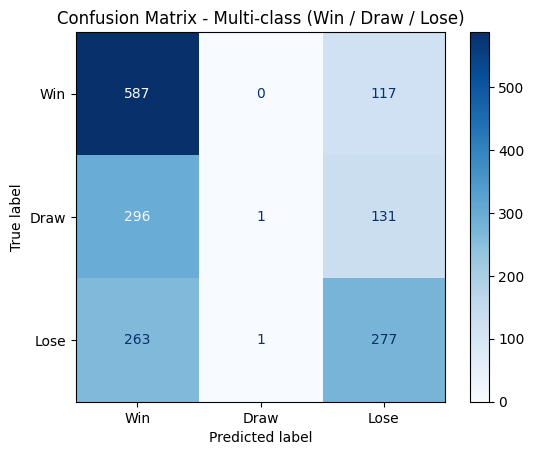

In [625]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Dự đoán nhãn
y_pred = model.predict(X_test)

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Win", "Draw", "Lose"])

# Vẽ ma trận
plt.figure(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Multi-class (Win / Draw / Lose)")
plt.grid(False)
plt.show()


In [45]:
from sklearn.metrics import log_loss, brier_score_loss

y_prob = model.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, y_prob))  # dùng để tối ưu mô hình


Log Loss: 1.0077535026143036


In [46]:
import numpy as np
from sklearn.metrics import log_loss

classes = [0, 1, 2]  # Win, Draw, Lose

for cls in classes:
    idx = (y_test == cls)
    y_true_bin = (y_test[idx] == cls).astype(int)
    y_pred_bin = y_prob[idx, cls]  # Lấy xác suất đúng lớp đó
    loss = log_loss(y_true_bin, y_pred_bin, labels=[0,1])
    print(f"🔍 Log Loss - Class {cls} ({['Win','Draw','Lose'][cls]}): {loss:.4f}")


🔍 Log Loss - Class 0 (Win): 0.7320
🔍 Log Loss - Class 1 (Draw): 1.3759
🔍 Log Loss - Class 2 (Lose): 1.0754


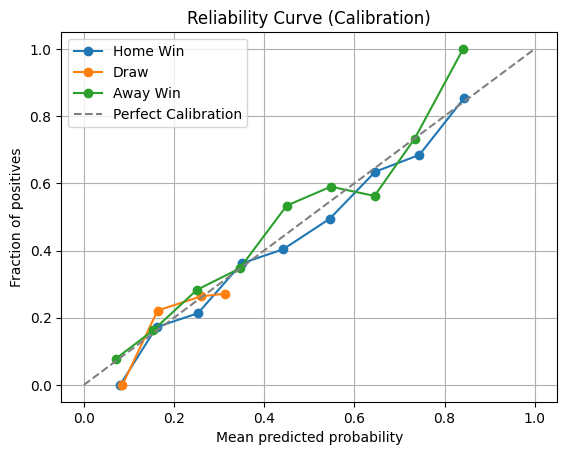

In [47]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Đánh giá cho từng lớp (0: HomeWin, 1: Draw, 2: AwayWin)
for class_idx, label in enumerate(["Home Win", "Draw", "Away Win"]):
    prob_true, prob_pred = calibration_curve((y_test == class_idx).astype(int), y_prob[:, class_idx], n_bins=10)

    plt.plot(prob_pred, prob_true, marker='o', label=f"{label}")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Reliability Curve (Calibration)")
plt.legend()
plt.grid(True)
plt.show()


In [48]:
import numpy as np
y_proba = model.predict_proba(X_test)

# Trung bình xác suất dự đoán cho mỗi lớp
print("Mean predicted probability per class:")
print(np.mean(y_proba, axis=0).round(2))

Mean predicted probability per class:
[0.45 0.25 0.3 ]


In [49]:
np.bincount(y_test) / len(y_test)

array([0.42080096, 0.25582785, 0.32337119])

In [50]:
import numpy as np

y_proba = model.predict_proba(X_test)

# Tính max & min theo từng lớp (trục = 0 là từng cột tương ứng class)
max_probs = np.max(y_proba, axis=0)
min_probs = np.min(y_proba, axis=0)

print("🔼 Max predicted probability per class:", np.round(max_probs, 4))
print("🔽 Min predicted probability per class:", np.round(min_probs, 4))


🔼 Max predicted probability per class: [0.8996 0.3896 0.8439]
🔽 Min predicted probability per class: [0.068  0.071  0.0258]


In [51]:
import pandas as pd

proba_df = pd.DataFrame(model.predict_proba(X_test), columns=["HomeWin", "Draw", "AwayWin"])
proba_df["true_label"] = y_test.reset_index(drop=True)
proba_df["predicted"] = model.predict(X_test)


In [52]:
proba_df["HomeTeam"] = features_df.loc[X_test.index, "HomeTeam"].reset_index(drop=True)
proba_df["AwayTeam"] = features_df.loc[X_test.index, "AwayTeam"].reset_index(drop=True)
proba_df["Date"] = features_df.loc[X_test.index, "Date"].reset_index(drop=True)

In [53]:
man_city_matches = proba_df[
    (proba_df["HomeTeam"] == "Man City") | (proba_df["AwayTeam"] == "Man City")
]

In [54]:
# Chỉ hiện các cột cần xem
man_city_matches_display = man_city_matches[
    ["Date", "HomeTeam", "AwayTeam", "HomeWin", "Draw", "AwayWin", "true_label", "predicted"]
]
man_city_matches_display

,Date,HomeTeam,AwayTeam,HomeWin,Draw,AwayWin,true_label,predicted
7,2024-08-18,Chelsea,Man City,0.419275,0.241681,0.339043,2,0
15,2024-08-24,Man City,Ipswich,0.679026,0.176936,0.144038,0,0
20,2024-08-31,West Ham,Man City,0.372112,0.269161,0.358727,2,0
32,2024-09-14,Man City,Brentford,0.657609,0.207978,0.134413,0,0
49,2024-09-22,Man City,Arsenal,0.579389,0.233806,0.186805,1,0
52,2024-09-28,Newcastle,Man City,0.233285,0.246572,0.520142,1,2
61,2024-10-05,Man City,Fulham,0.648704,0.202372,0.148923,0,0
77,2024-10-20,Wolves,Man City,0.162467,0.201711,0.635822,2,2
83,2024-10-26,Man City,Southampton,0.875182,0.076895,0.047923,0,0
95,2024-11-02,Bournemouth,Man City,0.205072,0.257516,0.537412,0,2


### Dự đoán 1 trận đấu

In [128]:
match_day = {
    "HomeTeam": "Man United",
    "AwayTeam": "Aston Villa",
    "Date": "2025-05-25",
    "League": "Premier League",
    "LeagueCode": 1,
    "HomeRank": 16,
    "AwayRank": 5,
    "HomePoint":39,
    "AwayPoint": 66,
    "HomeDiff": -12,
    "AwayDiff": 9,
    "HomeGF": 44,
    "AwayGF": 58,
    "HomeGA": 54,
    "AwayGA": 51,

}


In [129]:
league_map = {
    1: df0,
    2: df1,
    3: df2,
    4: df3,
    5: df4
}

df = league_map.get(match_day["LeagueCode"], pd.DataFrame())

In [130]:
def get_team_past_matches(df, team_name, date, code, n=7):
    date = pd.to_datetime(date)
    past_matches = df[
        ((df["HomeTeam"] == team_name) | (df["AwayTeam"] == team_name)) &
        (df["Date"] < date) & (df["LeagueCode"] == code)
    ].sort_values("Date", ascending=False).head(n)
    return past_matches

In [131]:
home = get_team_past_matches(df, match_day["HomeTeam"], match_day["Date"], match_day["LeagueCode"])
away = get_team_past_matches(df, match_day["AwayTeam"], match_day["Date"], match_day["LeagueCode"])

In [132]:
hometeam = features(home)
awayteam = features(away)

In [133]:
hometeam = hometeam[hometeam["Team"] == match_day["HomeTeam"]].reset_index(drop=True)
awayteam = hometeam[awayteam["Team"] == match_day["AwayTeam"]].reset_index(drop=True)

<ipython-input-133-85cda713237b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  awayteam = hometeam[awayteam["Team"] == match_day["AwayTeam"]].reset_index(drop=True)


In [106]:
hometeam

,ID,Date,Team,Season,GF,GA,Sh,ShT,Cn,F,YC,RC,Point,Conv_rate,ShT_ratio,Win,Draw,Lose,is_home
0,E0_2024-2025_292,2025-04-01,Man United,2024-2025,0.0,1.0,23.0,6.0,10.0,12.0,3.0,0.0,0,0.000000,0.260870,0,0,1,0
1,E0_2024-2025_308,2025-04-06,Man United,2024-2025,0.0,0.0,13.0,2.0,5.0,13.0,3.0,0.0,1,0.000000,0.153846,0,1,0,1
2,E0_2024-2025_317,2025-04-13,Man United,2024-2025,1.0,4.0,9.0,5.0,2.0,9.0,2.0,0.0,0,0.111111,0.555556,0,0,1,0
3,E0_2024-2025_329,2025-04-20,Man United,2024-2025,0.0,1.0,12.0,2.0,9.0,11.0,2.0,0.0,0,0.000000,0.166667,0,0,1,1
4,E0_2024-2025_338,2025-04-27,Man United,2024-2025,1.0,1.0,25.0,6.0,10.0,12.0,2.0,0.0,1,0.040000,0.240000,0,1,0,0
5,E0_2024-2025_348,2025-05-04,Man United,2024-2025,3.0,4.0,14.0,5.0,4.0,10.0,2.0,0.0,0,0.214286,0.357143,0,0,1,0
6,E0_2024-2025_360,2025-05-11,Man United,2024-2025,0.0,2.0,20.0,5.0,8.0,3.0,0.0,0.0,0,0.000000,0.250000,0,0,1,1


In [134]:
def extract_team_features(df, prefix="Home"):
    cols = [
        "GF", "GA", "Sh", "ShT", "Cn", "F", "YC", "RC",
        "Point", "Conv_rate", "ShT_ratio", "Win", "Draw", "Lose"
    ]

    rename = {
        "GF": "avg_gf", "GA": "avg_ga", "Sh": "avg_sh", "ShT": "avg_sht",
        "Cn": "avg_cn", "F": "F_avg", "YC": "YC_avg", "RC": "RC_avg",
        "Point": "point_avg", "Conv_rate": "conv_rate_avg",
        "ShT_ratio": "shT_ratio_avg", "Win": "win_avg",
        "Draw": "draw_avg", "Lose": "lose_avg"
    }

    avg = df[cols].mean().round(2).to_dict()

    return {f"{prefix}_{rename[k]}": v for k, v in avg.items()}


In [135]:
home_features = extract_team_features(hometeam, prefix="Home")
away_features = extract_team_features(awayteam, prefix="Away")

In [136]:
feature_row = {**home_features, **away_features}

In [137]:
feature_row

{'Home_avg_gf': 0.71,
 'Home_avg_ga': 1.86,
 'Home_avg_sh': 16.57,
 'Home_avg_sht': 4.43,
 'Home_avg_cn': 6.86,
 'Home_F_avg': 10.0,
 'Home_YC_avg': 2.0,
 'Home_RC_avg': 0.0,
 'Home_point_avg': 0.29,
 'Home_conv_rate_avg': 0.05,
 'Home_shT_ratio_avg': 0.28,
 'Home_win_avg': 0.0,
 'Home_draw_avg': 0.29,
 'Home_lose_avg': 0.71,
 'Away_avg_gf': 0.33,
 'Away_avg_ga': 1.0,
 'Away_avg_sh': 20.0,
 'Away_avg_sht': 4.67,
 'Away_avg_cn': 9.67,
 'Away_F_avg': 11.67,
 'Away_YC_avg': 2.33,
 'Away_RC_avg': 0.0,
 'Away_point_avg': 0.33,
 'Away_conv_rate_avg': 0.01,
 'Away_shT_ratio_avg': 0.22,
 'Away_win_avg': 0.0,
 'Away_draw_avg': 0.33,
 'Away_lose_avg': 0.67}

In [146]:
f = {
     'LeagueCode' : match_day['LeagueCode'],
     'HomeRank' :  match_day['HomeRank'],
     'AwayRank': match_day['AwayRank'],
     'HomePoint':  match_day['HomePoint'],
     'AwayPoint':  match_day['AwayPoint'],

     'HomeDiff': match_day['HomeDiff'],
     'AwayDiff': match_day['AwayDiff'],

      'HomeGF':match_day['HomeGF'],
      'AwayGF': match_day['AwayGF'],
      'HomeGA': match_day['HomeGA'],
      'AwayGA': match_day['AwayGA'],

      'Home_point_avg' : feature_row['Home_point_avg'] ,
      'Away_point_avg' : feature_row['Away_point_avg'],

       'Home_avg_gf' : feature_row['Home_avg_gf'],
       'Away_avg_gf' :  feature_row['Away_avg_gf'],
       'Home_avg_ga':  feature_row['Home_avg_ga'],
       'Away_avg_ga': feature_row['Away_avg_ga'],

       'Home_win_avg' : feature_row['Home_win_avg'] ,
       'Away_win_avg': feature_row['Home_win_avg'] ,

       'Home_lose_avg': feature_row['Home_lose_avg'] ,
      'Away_lose_avg': feature_row['Away_lose_avg'] ,

      'Home_draw_avg': feature_row['Home_draw_avg'] ,
       'Away_draw_avg': feature_row['Away_draw_avg'] ,

       'Home_avg_sh': feature_row['Home_avg_sh'] ,
        'Away_avg_sh': feature_row['Away_avg_sh'] ,

       'Home_avg_sht': feature_row['Home_avg_sht'] ,
       'Away_avg_sht': feature_row['Away_avg_sht'] ,

     'diff_point': match_day['HomePoint'] - match_day['AwayPoint'] ,
     'diff_rank':  match_day['HomeRank'] - match_day['AwayRank'] ,
     'diff_GD':  match_day['HomeDiff'] - match_day['AwayDiff'] ,
      'diff_GF':  match_day['HomeGF'] - match_day['AwayGF'] ,
      'diff_GA':  match_day['HomeGA'] - match_day['AwayGA'] ,

    'diff_Form': feature_row['Home_point_avg'] - feature_row['Away_point_avg'],
    'diff_Win': feature_row['Home_win_avg'] - feature_row['Away_win_avg'] ,
    'diff_Draw':  feature_row['Home_draw_avg'] - feature_row['Away_draw_avg'] ,
    'diff_Lose':  feature_row['Home_lose_avg'] - feature_row['Away_lose_avg'] ,
    'diff_gf':  feature_row['Home_avg_gf'] - feature_row['Away_avg_gf'],
    'diff_ga':  feature_row['Home_avg_ga'] - feature_row['Away_avg_ga'] ,
    'diff_sh':  feature_row['Home_avg_sh'] - feature_row['Away_avg_sh'],
    'diff_sht':  feature_row['Home_avg_sht'] - feature_row['Away_avg_sht'] ,

}
f['draw_score'] = sum([
    abs(f["diff_rank"]) <= 6,
    abs(f["diff_point"]) <= 6,
    abs(f["diff_GD"]) <= 15,
    abs(f["diff_GA"]) <= 10,
    abs(f["diff_GF"]) <= 10,
    abs(f["diff_Form"]) <= 0.6,
    abs(f["diff_Win"]) <= 0.25,
    abs(f["diff_Lose"]) <= 0.25,
    abs(f["diff_gf"]) <= 1.5,
    abs(f["diff_ga"]) <= 1.5,
    abs(f["diff_sh"]) <= 4,
    abs(f["diff_sht"]) <= 2
]) / 12


In [147]:
X_input = pd.DataFrame([f])[selected_features]

probs = model.predict_proba(X_input)[0]

In [149]:
print(" Dự đoán xác suất trận:")
print(f" Đội nhà thắng : {probs[0]*100:.2f}%")
print(f" Hòa           : {probs[1]*100:.2f}%")
print(f" Đội khách thắng: {probs[2]*100:.2f}%")

 Dự đoán xác suất trận:
 Đội nhà thắng : 27.56%
 Hòa           : 25.01%
 Đội khách thắng: 47.43%
